# SVM


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\AMAN DONGRE\\Downloads\\te.csv")
df

,Date,City,NH3,PM2,PM10,SO2,NOx,CO,O3,AQI,AQI_bucket
0,01-01-2019,Ghaziabad,71.92,327.50,501.99,20.23,141.46,3.35,17.66,490.0,Severe
1,02-01-2019,Ghaziabad,78.02,387.45,569.04,21.29,176.59,4.06,9.32,574.0,Severe
2,03-01-2019,Ghaziabad,74.85,399.51,527.45,18.03,133.11,3.52,21.91,522.0,Severe
3,04-01-2019,Ghaziabad,66.06,313.46,428.54,19.64,91.64,1.89,8.96,449.0,Severe
4,05-01-2019,Ghaziabad,64.06,251.39,351.39,18.55,63.92,2.23,6.42,401.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...
3809,20-06-2022,Bhiwadi,55.93,44.41,96.75,8.57,77.94,0.72,7.31,97.0,Satisfactory
3810,21-06-2022,Bhiwadi,61.08,47.80,104.82,8.93,82.73,0.78,6.69,103.0,Moderate
3811,22-06-2022,Bhiwadi,65.68,74.36,165.26,9.92,89.22,1.01,5.61,148.0,Moderate
3812,23-06-2022,Bhiwadi,129.75,166.03,317.93,16.01,157.82,1.17,5.79,335.0,Very Poor


In [3]:
print(df.dtypes)

 Date          object
City           object
NH3           float64
PM2           float64
PM10          float64
SO2           float64
NOx           float64
CO            float64
O3            float64
AQI           float64
AQI_bucket     object
dtype: object


In [4]:
df[' Date'] = df[' Date'].astype('datetime64')


C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '13-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '14-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '15-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '16-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

In [5]:
print(df.dtypes)

 Date         datetime64[ns]
City                  object
NH3                  float64
PM2                  float64
PM10                 float64
SO2                  float64
NOx                  float64
CO                   float64
O3                   float64
AQI                  float64
AQI_bucket            object
dtype: object


In [6]:
df['City'] = df['City'].astype('str')
df['AQI_bucket'] = df['AQI_bucket'].astype('str')
print(df.dtypes)

 Date         datetime64[ns]
City                  object
NH3                  float64
PM2                  float64
PM10                 float64
SO2                  float64
NOx                  float64
CO                   float64
O3                   float64
AQI                  float64
AQI_bucket            object
dtype: object


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = df["AQI_bucket"]
x = df[['PM2', 'PM10', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [9]:
print(y_train)

3017    Satisfactory
2828            Poor
2862       Very Poor
529         Moderate
1856        Moderate
            ...     
835             Poor
3264       Very Poor
1653       Very Poor
2607            Poor
2732        Moderate
Name: AQI_bucket, Length: 2669, dtype: object


In [10]:
print(X_test)

         PM2    PM10     NOx    NH3        CO    SO2         O3    AQI
1069  143.82  293.76  113.17  57.84  5.470000  14.98  89.670000  318.0
725   229.25  333.28    1.17   1.21  1.440000  12.46  28.160000  384.0
2196  100.35   15.58   32.98  29.55  0.490000   6.32  27.490000  234.0
599    10.94   41.54   13.01   4.92  1.291607   6.21  32.856315   65.0
2774   85.69  164.31   29.64  24.31  0.640000  15.84  10.710000  186.0
...      ...     ...     ...    ...       ...    ...        ...    ...
1850   85.12   26.49   25.47  25.12  0.820000   8.44   6.060000  184.0
2507  285.89   41.15   34.41  92.45  1.300000  14.00  20.340000  428.0
1110  111.18  192.31   22.51  28.97  1.080000   5.15   0.600000  271.0
3780  123.74  224.59   90.40  66.49  0.710000  21.55   5.270000  303.0
2377   87.06   20.66   40.48  47.27  0.550000   9.27   8.540000  190.0

[1145 rows x 8 columns]


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[-1.16439613 -0.61383475 -1.06719744 ... -0.66770172 -0.28531027
  -1.57804439]
 [-0.47256355  0.6763028   0.25809107 ...  0.70498426 -0.73943597
  -0.29065715]
 [-0.06450662  1.32539116  2.35930451 ...  0.72100091 -0.70350515
   0.27891417]
 ...
 [ 0.83829679 -0.9800635  -0.05378818 ... -0.88956194 -0.70899458
   0.80167141]
 [-0.57323141  0.12606643  0.13022431 ...  1.72233796 -0.64461852
  -0.5481346 ]
 [-1.03172584 -0.30246587  1.37862918 ... -0.55914444  1.06409183
  -1.21913644]]


In [13]:
print(X_test)

[[-0.05093924  0.98625738  1.58883232 ... -0.29516637  3.46946095
   0.28671652]
 [ 0.83384006  1.28043137 -1.4647022  ... -0.44465507  0.39987061
   0.80167141]
 [-0.50114825 -1.08442381 -0.59744387 ... -0.80888549  0.36643498
  -0.36868062]
 ...
 [-0.38898438  0.23109667 -0.88289482 ... -0.87829096 -0.97548153
  -0.07999379]
 [-0.25890328  0.47137846  0.96803784 ...  0.09457205 -0.74243021
   0.16968131]
 [-0.6387898  -1.04660995 -0.39296611 ... -0.63388879 -0.57924438
  -0.71198389]]


In [58]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',C = 50.0, cache_size = 200, class_weight = None, coef0 = 0.0, degree = 3, gamma = 'scale', probability = False, random_state = None, shrinking = False,
tol = 0.001, verbose = False)
classifier.fit(X_train, y_train)

SVC(C=50.0, kernel='linear', shrinking=False)

In [59]:
print(classifier.predict(sc.transform([['50.38','13.36','153.4','1.13','12.26','595','5','50.38']])))

['Good']


C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:
y_pred = classifier.predict(X_test)


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  9   0   0   3   0   0]
 [  0 251   5   6   0   0]
 [  0   1 166   0   0   1]
 [  2   2   0 111   0   0]
 [  0   0   0   0 137   2]
 [  0   0   0   0   0 449]]


0.9807860262008734

In [62]:
cm= confusion_matrix(y_test,y_pred)  

<AxesSubplot:>

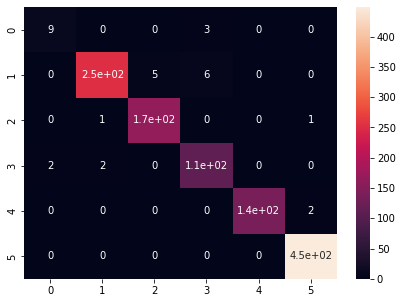

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.82      0.75      0.78        12
    Moderate       0.99      0.96      0.97       262
        Poor       0.97      0.99      0.98       168
Satisfactory       0.93      0.97      0.94       115
      Severe       1.00      0.99      0.99       139
   Very Poor       0.99      1.00      1.00       449

    accuracy                           0.98      1145
   macro avg       0.95      0.94      0.94      1145
weighted avg       0.98      0.98      0.98      1145



In [66]:
classifier.score(X_test, y_test)

0.9807860262008734